# Importar datos

In [1]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Censo Aves

In [2]:
# Importación de mi DF
censo = pd.read_csv(r'C:/Users/monic/OneDrive/Desktop/It Academmy - Data Analysis/Projecte/Python archibos buenos/tabla_madre.csv', delimiter=',', quotechar='"')

#Acabar de hacer la limpieza de datos
censo['LR2021 Repro'] = censo['LR2021 Repro'].replace('VU(EN/VU)', 'VU')
censo['Estatus Consolidado'] = censo['Estatus Consolidado'].replace('VU(EN/VU)', 'VU')
censo['LR2004'] = censo['LR2004'].replace('EN/VU', 'VU')
censo['Average SST month'] = pd.to_numeric(censo['Average SST month'], errors='coerce')
censo['SST change'] = pd.to_numeric(censo['SST change'], errors='coerce')

# SUma de todas las Areas Marinas Protegidas
censo['Total_MPAs'] = censo['World heritage site'] + censo['SPAMI'] + censo['Marine Natura 2000 site'] + censo['Marine Natura 2000 proposed site'] + censo['MPA with a national statute'] + censo['Biosphere reserve']

# Selecciono solo los datos de 2007 a 2023
year_no_quiero = list(range(2007,2024))
censo2=censo[censo['year'].isin(year_no_quiero)]

# Exploración de los datos

## Especies aves marinas totales
Numero de individuos censado por especie

## 2006-2025

In [3]:
especies_totales = censo.groupby(['NOMBRE COMÚN'])['count_aves'].sum().reset_index()
especies_totales = especies_totales.sort_values('count_aves')
especies_totales

,NOMBRE COMÚN,count_aves
21,Págalo pomarino,31
18,Paíño europeo,39
2,Charrán común,48
8,Gaviota de Audouin,51
12,Gaviota sombría,56
6,Frailecillo atlántico,57
20,Págalo parásito,74
19,Págalo grande,104
9,Gaviota enana,158
13,Gaviota tridáctila,224


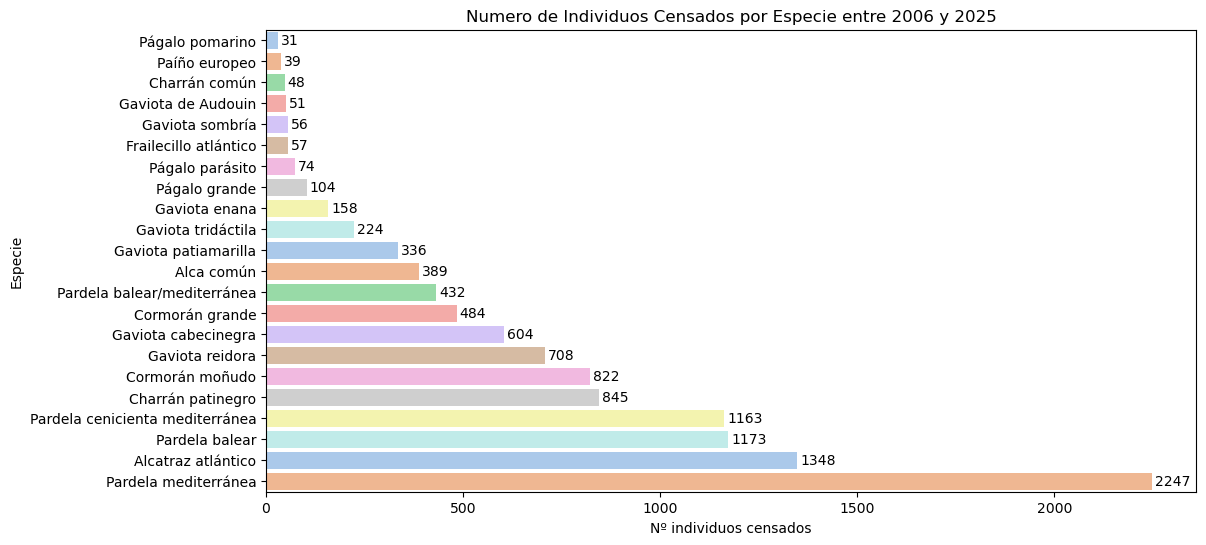

In [4]:
# Graficar las especies de aves marinas mas comunes que aparecen en el censo.

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=especies_totales, y='NOMBRE COMÚN', x ='count_aves', hue='NOMBRE COMÚN', palette='pastel')
plt.title('Numero de Individuos Censados por Especie entre 2006 y 2025')
plt.xlabel('Nº individuos censados')
plt.ylabel('Especie')

#Etiqueta de datos
for container in ax.containers:
    ax.bar_label(container ,label_type='edge', padding=2)
    
plt.savefig('individuos_censo_especie_todos_year.png', dpi=300, bbox_inches='tight')
plt.show()

## 2007-2023

In [5]:
especies_totales2 = censo2.groupby(['NOMBRE COMÚN'])['count_aves'].sum().reset_index()
especies_totales2 = especies_totales2.sort_values('count_aves')
especies_totales2

,NOMBRE COMÚN,count_aves
21,Págalo pomarino,22
2,Charrán común,31
18,Paíño europeo,34
8,Gaviota de Audouin,37
6,Frailecillo atlántico,40
12,Gaviota sombría,42
20,Págalo parásito,51
9,Gaviota enana,101
19,Págalo grande,103
13,Gaviota tridáctila,183


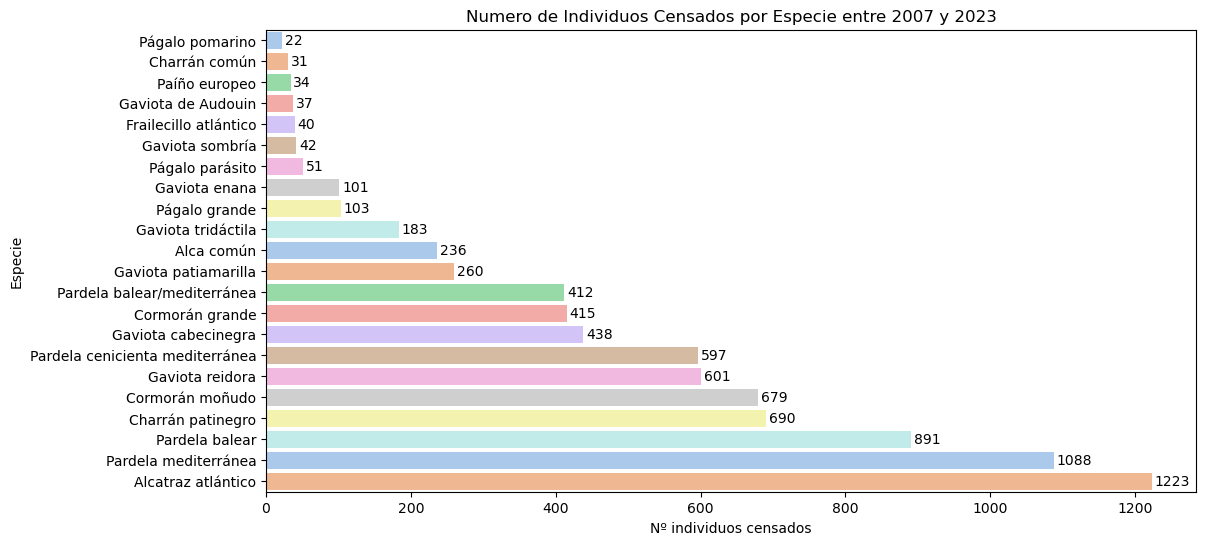

In [6]:
# Graficar las especies de aves marinas mas comunes que aparecen en el censo.

plt.figure(figsize=(12, 6))
ax= sns.barplot(data=especies_totales2, y='NOMBRE COMÚN', x ='count_aves', hue='NOMBRE COMÚN', palette='pastel')
plt.title('Numero de Individuos Censados por Especie entre 2007 y 2023')
plt.xlabel('Nº individuos censados')
plt.ylabel('Especie')
for container in ax.containers:
    ax.bar_label(container ,label_type='edge', padding=2)

plt.savefig('individuos_censo_especie_todos_2007_2023.png', dpi=300, bbox_inches='tight')   
plt.show()

## Distribución temporal especies 
Contar el número de censos por año y por mes. Asumiendo que tienes una columna de fecha (si no, habría que crearla a partir del año y el mes).


### Numero de individuos censados por año

## 2006-2025

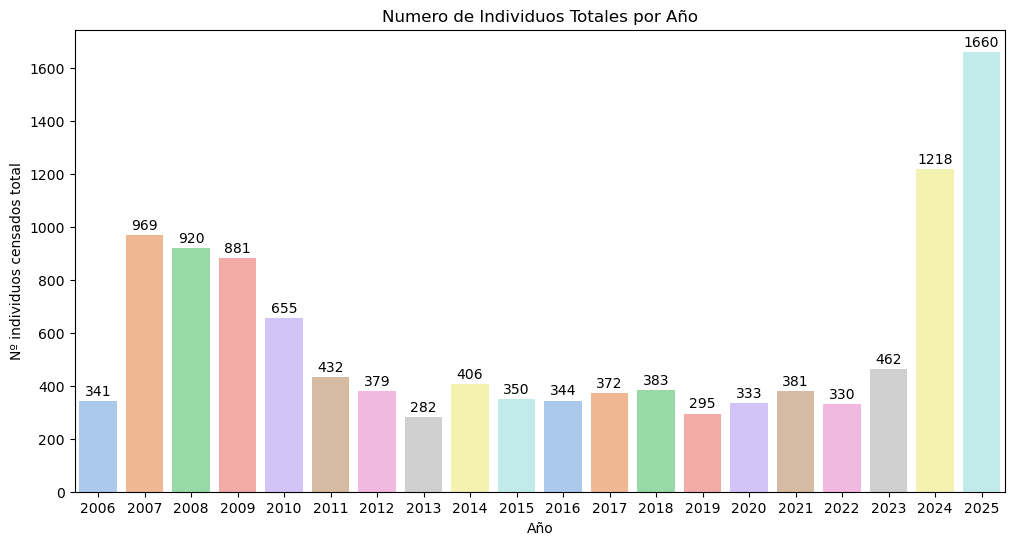

In [7]:
individuos_year = censo.groupby(['year'])['count_aves'].sum().reset_index()
individuos_year=individuos_year.sort_values('year')
individuos_year

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=individuos_year, y='count_aves', x ='year', hue='year', palette='pastel', legend=False)
plt.title('Numero de Individuos Totales por Año')
plt.xlabel('Año')
plt.ylabel('Nº individuos censados total')

for container in ax.containers:
    ax.bar_label(container ,label_type='edge', padding=2)

plt.savefig('total_individuos_year.png', dpi=300, bbox_inches='tight')
    
plt.show()

## 2007-2023

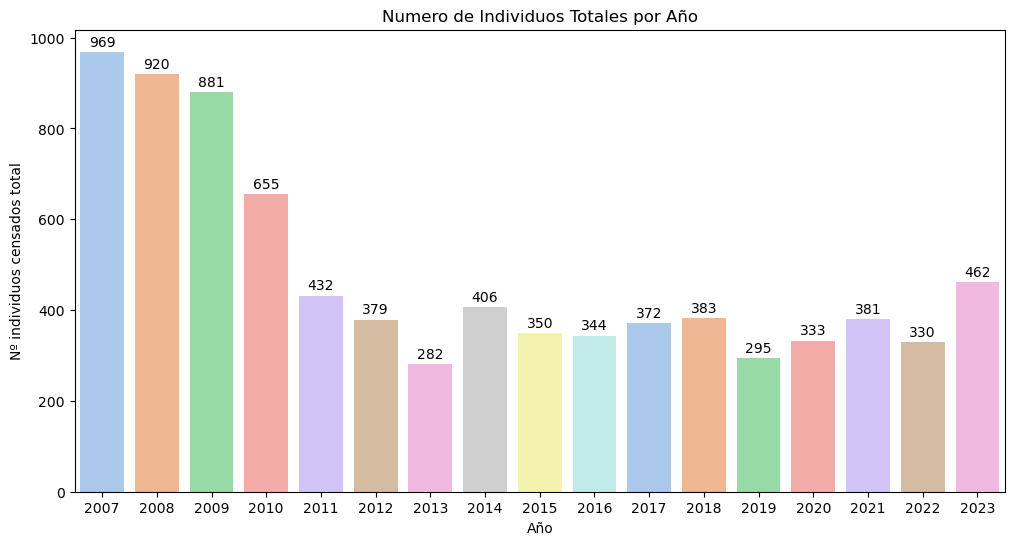

In [8]:
individuos_year2 = censo2.groupby(['year'])['count_aves'].sum().reset_index()
individuos_year2=individuos_year2.sort_values('year')
individuos_year2

plt.figure(figsize=(12, 6))
ax= sns.barplot(data=individuos_year2, y='count_aves', x ='year', hue='year', palette='pastel', legend=False)
plt.title('Numero de Individuos Totales por Año')
plt.xlabel('Año')
plt.ylabel('Nº individuos censados total')

for container in ax.containers:
    ax.bar_label(container ,label_type='edge', padding=2)

plt.savefig('individuos_2007_2023.png', dpi=300, bbox_inches='tight')
    
plt.show()